# IMPORTE DE LIBRERIAS NECESARIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns

# Lectura de los datos de evaluación

In [2]:
datos  = pd.read_csv('evalNucleoMeanShift.csv',sep=';',index_col=0)
datos.head()

,CLASE,CELULA,FN,FP,VP,VN,P,R,E,NSR,FM,ER,NRM,JACC,DICE
0,1,normalSup1.jpg,250,0,549,43427,1.000000,0.687109,0.994347,0.000000,0.814540,0.000000,0.156446,0.687109,0.814540
1,1,normalSup10.jpg,246,0,396,107114,1.000000,0.616822,0.997717,0.000000,0.763006,0.000000,0.191589,0.616822,0.763006
2,1,normalSup11.jpg,270,0,430,85430,1.000000,0.614286,0.996865,0.000000,0.761062,0.000000,0.192857,0.614286,0.761062
3,1,normalSup12.jpg,157,2,547,72122,0.996357,0.776989,0.997817,0.003656,0.873105,0.002841,0.112926,0.774788,0.873105
4,1,normalSup13.jpg,351,0,265,46340,1.000000,0.430195,0.992525,0.000000,0.601589,0.000000,0.284903,0.430195,0.601589


# DESCRIPCION GENERAL

In [3]:
datos.describe()

,CLASE,FN,FP,VP,VN,P,R,E,NSR,FM,ER,NRM,JACC,DICE
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,849.000000,849.000000,917.000000,917.000000,917.000000,917.000000
mean,4.577972,832.351145,503.960742,2148.970556,24368.075245,0.828391,0.736719,0.900110,0.748082,0.812345,0.267900,0.265590,0.657124,0.752106
std,1.816252,1359.800607,1607.447754,1680.876468,35030.800603,0.292908,0.272678,0.115785,12.843344,0.163454,1.783042,0.890158,0.261725,0.264745
min,1.000000,0.000000,0.000000,0.000000,429.000000,0.000000,0.000000,0.248762,0.000000,0.000912,0.000000,0.017373,0.000000,0.000000
25%,3.000000,169.000000,0.000000,959.000000,4441.000000,0.816647,0.657955,0.858804,0.000000,0.757897,0.000000,0.077280,0.566697,0.723429
50%,5.000000,336.000000,44.000000,1840.000000,9158.000000,0.980046,0.827856,0.942931,0.014734,0.857785,0.016310,0.144551,0.730076,0.843982
75%,6.000000,815.000000,372.000000,3020.000000,26683.000000,1.000000,0.928099,0.979551,0.146970,0.924937,0.128840,0.261857,0.850236,0.919057
max,7.000000,9586.000000,27577.000000,10053.000000,229608.000000,1.000000,1.000000,0.999642,370.222222,0.982420,39.503984,19.751992,0.965448,0.982420


# Etiquetado de cada célula según las distintas nomeclaturas

In [4]:
#2 Clases(normal,Anormal)
binario = []
for ind, ele in enumerate(datos['CLASE']):
    if ele == 1 or ele == 2 or ele == 3:
        binario.append('1_NORMAL')
    if ele == 4 or ele == 5 or ele == 6 or ele == 7:
        binario.append('2_ANORMAL')
datos['BIN'] = binario

# tres clases,  Corriente citologíca
#normal, lsil,hsil
cytology = []
for ind, ele in enumerate(datos['CLASE']):
    if ele == 1 or ele == 2 or ele == 3:
         cytology.append('1_NORMAL')
    if ele == 4:
        cytology.append('2_LSIL')
    if ele == 5 or ele == 6 or ele == 7:
        cytology.append('3_HSIL')
datos['CYT'] = cytology


# cuatro  clases, corriente Histológica
#normal, CIN1,CIN2,CIN3
cytology = []
for ind, ele in enumerate(datos['CLASE']):
    if ele == 1 or ele == 2 or ele == 3:
         cytology.append('1_NORMAL')
    if ele == 4:
        cytology.append('2_CIN1')
    if ele == 5:
        cytology.append('3_CIN2')
    if ele == 6 or ele == 7:
        cytology.append('4_CIN3')
datos['HIST'] = cytology

In [8]:
puntaje = datos[datos['CLASE'] == 1]
puntaje = puntaje['P'].mean()
print(np.round(puntaje,decimals=3))

0.899


In [10]:
puntaje = datos['P'].mean()
print(np.round(puntaje,decimals=3))

0.828


# ANALISIS DE TENDENCIA CENTRAL

(0.0, 1.0)

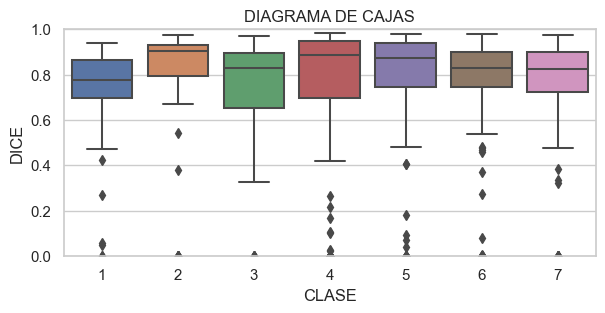

In [5]:
plt.figure(figsize=(7,3),dpi=98)
sns.set(style='whitegrid')
sns.boxplot(x="CLASE",y="DICE",data=datos)
plt.title('DIAGRAMA DE CAJAS')
plt.ylim((0,1))

(0.0, 1.0)

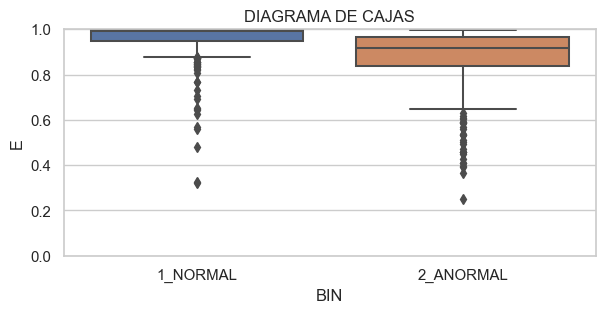

In [6]:
plt.figure(figsize=(7,3),dpi=98)
sns.set(style='whitegrid')
sns.boxplot(x="BIN",y="E",data=datos)
plt.title('DIAGRAMA DE CAJAS')
plt.ylim((0,1))